In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#set up palette and style used in plots
palette=  sns.color_palette("muted")#sns.palplot(sns.color_palette("hls", 8))#sns.diverging_palette(255, 133, l=60, n=7, center="dark")
sns.set_style("whitegrid",{"palette":palette} )
sns.set(palette=palette)

## Applying the CRISP-DM to COVID-19 datasets:           
    
CRISP-DM is cross industry standard process for data mining which will include the following:     
>1. Buisness understanding     
2. Data understanding     
3. Data preperation    
4. Modeling     
5. Evaluate    
6. Deployment (Deployment here is a blog post linked about the insights linked in the README)     

The datasest used are kaggle datasets linked in the README file

## 1. Topics: (Buisness understanding)
        
 This notebook is going to show some information about the coronavirus. It will tackel the following topics:
>1. **Coronavirus infection rates:**          
1.1 What is the growth rate of the COVID-19 ?(ex. exponential growth, linear growth)     
1.2 Which age group has the highest number of infections? ?
2. **Mortality rates:**         
2.1 What is the Percentage of death from COVID-19 patients?     
2.2 What is the Percentage of death from COVID-19 patients per age group?    
2.3 How long does it take on average for a person to die from COVID-19?       
2.4 Which countries have the highest number of death from COVID-19?     
3. **Recovery rates**       
3.1 What is the average recovery time from COVID-19? Does it vary by age group ?     
3.2 What are the top 20 countries that have the highest **number** of recoveries?     
3.3 What are the top 20 countries that have the highest **percentage** of recoveries?

## 2. Data understanding

### Understanding the novel corona virus 2019 dataset

In [3]:
covid_19_data= pd.read_csv("novel_cv_2019/covid_19_data.csv")
covid_19_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covid_19_data.describe()

,SNo,Confirmed,Deaths,Recovered
count,11614.000000,11614.000000,11614.000000,11614.000000
mean,5807.500000,1175.025831,51.019373,320.180902
std,3352.817348,7096.206263,490.706034,3145.856598
min,1.000000,0.000000,0.000000,0.000000
25%,2904.250000,4.000000,0.000000,0.000000
50%,5807.500000,39.000000,0.000000,0.000000
75%,8710.750000,266.000000,2.000000,17.000000
max,11614.000000,119827.000000,14681.000000,63612.000000


In [5]:
covid_19_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11614 entries, 0 to 11613
Data columns (total 8 columns):
SNo                11614 non-null int64
ObservationDate    11614 non-null object
Province/State     6128 non-null object
Country/Region     11614 non-null object
Last Update        11614 non-null object
Confirmed          11614 non-null float64
Deaths             11614 non-null float64
Recovered          11614 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 726.0+ KB


### Understanding the DS4C dataset

In [6]:
DS4C = pd.read_csv("DS4C/PatientInfo.csv")
DS4C.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [7]:
DS4C["country"].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand',
       'Switzerland', 'Mongolia'], dtype=object)

In [8]:
DS4C.describe()

,patient_id,global_num,birth_year,infection_order,infected_by,contact_number
count,2.771000e+03,1664.000000,2414.000000,31.000000,6.500000e+02,517.000000
mean,3.748468e+09,5558.304087,1974.374896,2.387097,2.647075e+09,20.849130
std,2.209410e+09,3142.434246,20.284689,1.453213,1.687647e+09,81.595859
min,1.000000e+09,1.000000,1916.000000,1.000000,1.000000e+09,0.000000
25%,1.400000e+09,2693.500000,1960.000000,1.000000,1.200000e+09,2.000000
50%,4.100000e+09,6344.500000,1974.000000,2.000000,2.000000e+09,5.000000
75%,6.001001e+09,8268.250000,1993.000000,3.000000,4.100000e+09,15.000000
max,7.000000e+09,9652.000000,2020.000000,6.000000,6.100000e+09,1160.000000


In [9]:
DS4C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 18 columns):
patient_id            2771 non-null int64
global_num            1664 non-null float64
sex                   2765 non-null object
birth_year            2414 non-null float64
age                   2758 non-null object
country               2771 non-null object
province              2771 non-null object
city                  2703 non-null object
disease               19 non-null object
infection_case        1843 non-null object
infection_order       31 non-null float64
infected_by           650 non-null float64
contact_number        517 non-null float64
symptom_onset_date    389 non-null object
confirmed_date        2771 non-null object
released_date         709 non-null object
deceased_date         48 non-null object
state                 2771 non-null object
dtypes: float64(5), int64(1), object(12)
memory usage: 389.8+ KB


## 3. Data preperation and modeling

### 1. Coronavirus infection rates:

### 1.1 what is the growth rate of COVID-19?

In [10]:
spread_over_time = covid_19_data.groupby("ObservationDate").sum().sort_values("ObservationDate").reset_index()
spread_over_time.head()

,ObservationDate,SNo,Confirmed,Deaths,Recovered
0,01/22/2020,741,555.0,17.0,28.0
1,01/23/2020,2829,653.0,18.0,30.0
2,01/24/2020,4305,941.0,26.0,36.0
3,01/25/2020,6490,1438.0,42.0,39.0
4,01/26/2020,9071,2118.0,56.0,52.0


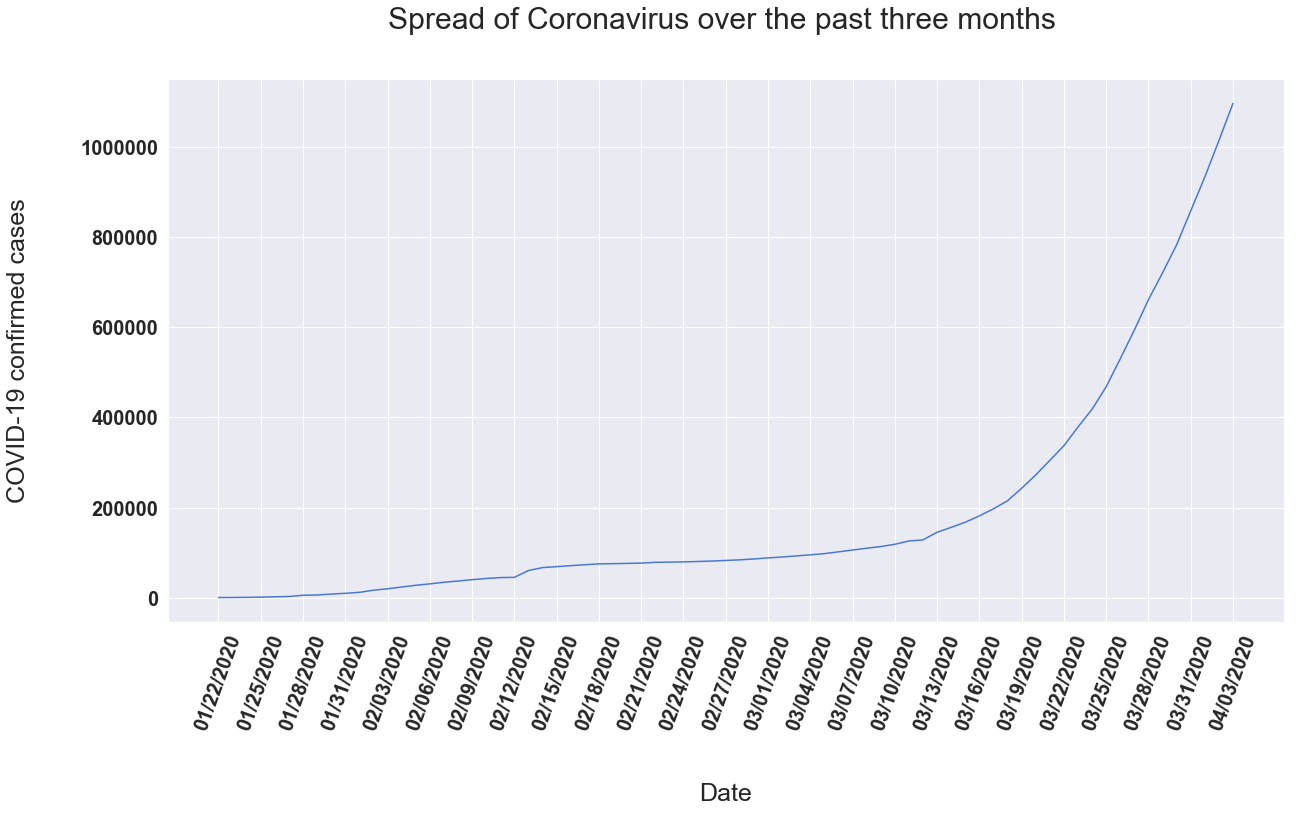

In [38]:
plt.figure(figsize=(20,10))
X = spread_over_time["ObservationDate"].tolist()
Y = spread_over_time["Confirmed"].tolist()

plt.plot(X,Y)
plt.xticks(fontsize=20, fontweight="bold", rotation=70, ticks=[X[i] for i in range(0,len(X),3)])
plt.yticks(fontsize=20,fontweight="bold")

plt.title("Spread of Coronavirus over the past three months ", fontsize=30,pad=50)


plt.xlabel("Date", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.show()

 > The COVID-19 is growing exponentially. Growing ate very rapid speeds. Thi is the power of exponentials.

### 1.2 Which age group have the highest number of infections?

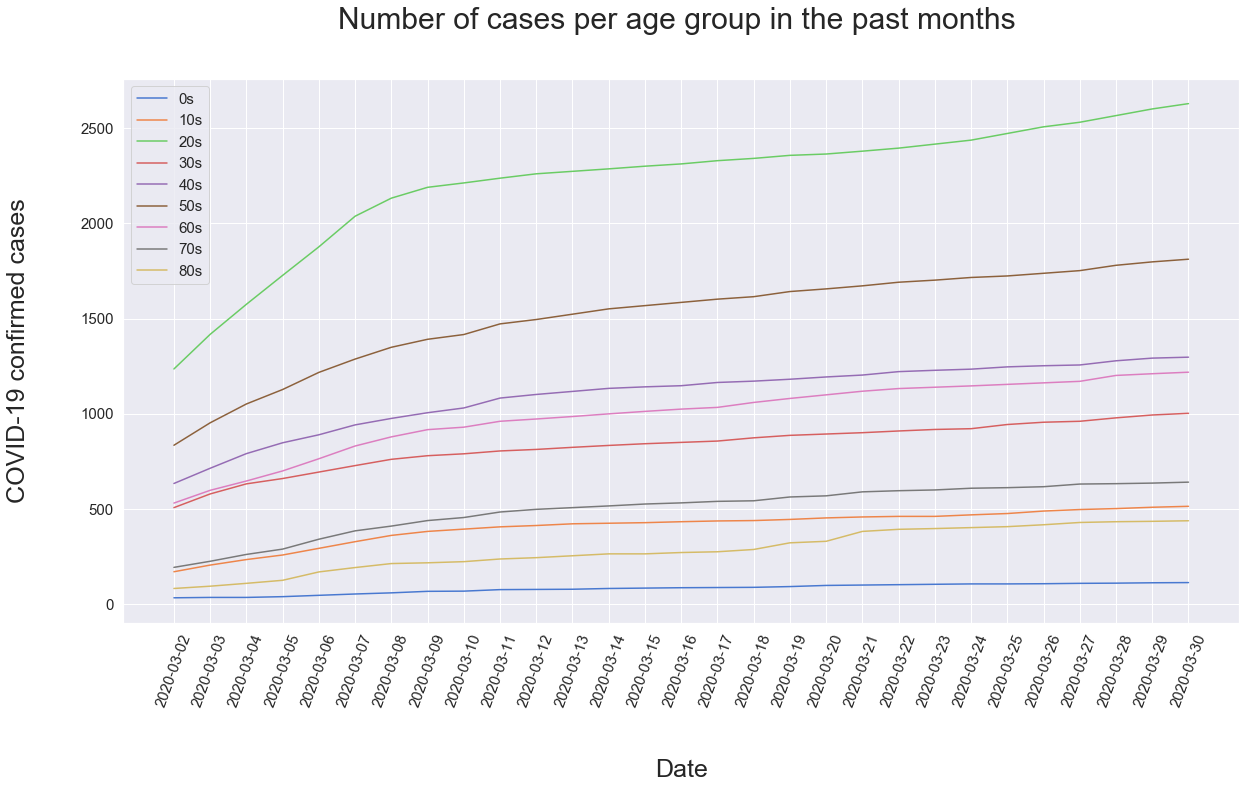

In [12]:
age_df = pd.read_csv("DS4C/TimeAge.csv")
plt.figure(figsize=(20,10))

for age in age_df["age"].unique():
    filtered_age = age_df[age_df["age"]==age]
    X= filtered_age["date"]
    Y= filtered_age["confirmed"]
    
    plt.plot(X,Y,label=str(age))

plt.legend(fontsize=15)
plt.xticks(rotation=90)

plt.xticks(fontsize=15, rotation=70)
plt.yticks(fontsize=15)

plt.title("Number of cases per age group in the past months ", fontsize=30,pad=50)

plt.xlabel("Date", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.show()

> It looks like people in their 20s gets infected the most.

## 2. Mortality rates:

### 2.1 What is the percentage of deaths from corona virus patients ?

In [13]:
percentage_of_death= (covid_19_data["Deaths"].sum()/covid_19_data["Confirmed"].sum())*100
print("{:.2f}% of COVID-19 patients died arround the world".format(percentage_of_death))

4.34% of COVID-19 patients died arround the world


In [14]:
covid_patients= covid_19_data["Confirmed"].sum() - covid_19_data["Deaths"].sum() - covid_19_data["Recovered"].sum()
covid_Deaths = covid_19_data["Deaths"].sum()
covid_recovered = covid_19_data["Recovered"].sum()

labels = 'COVID-19 patients', 'Deaths', 'Recovered'
sizes = [covid_patients, covid_Deaths, covid_recovered]
colors = ['#f1e7b6', '#fe346e','#00bdaa']
explode = (0, 0.1, 0)  # explode 1st slice

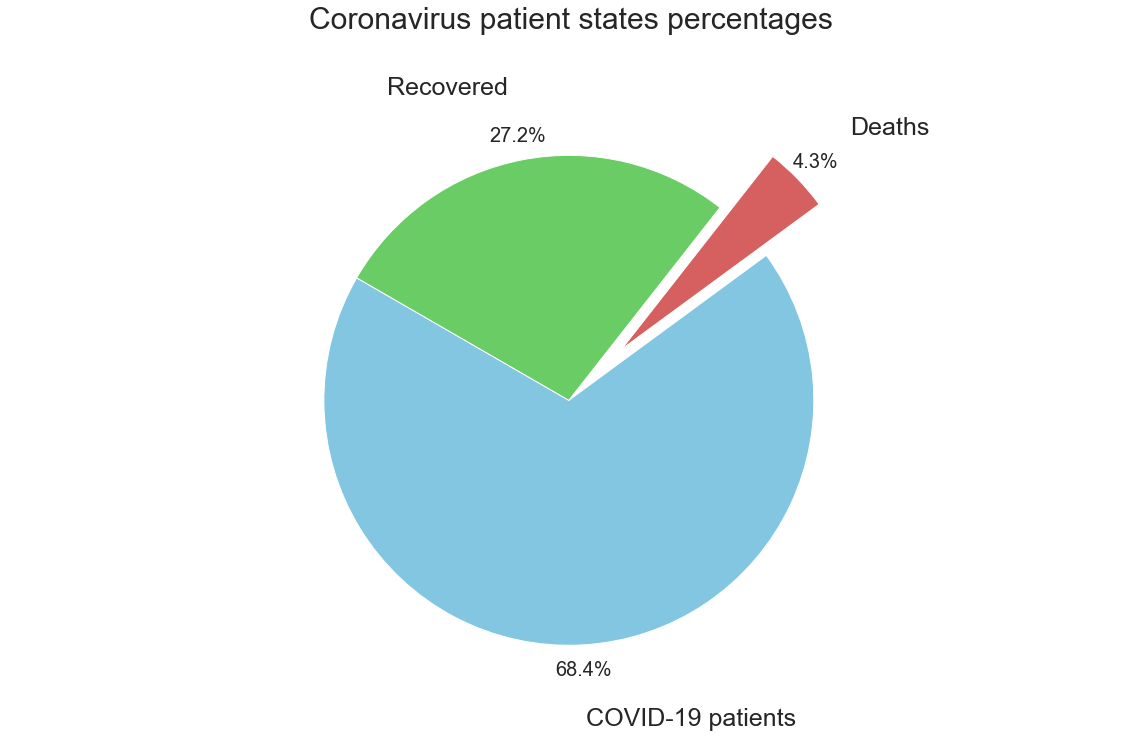

In [15]:
#mpl.style.use('ggplot')

plt.figure(figsize=(20,10))


#plt.style.use('ggplot')
covid_patients= covid_19_data["Confirmed"].sum() - covid_19_data["Deaths"].sum() - covid_19_data["Recovered"].sum()
covid_Deaths = covid_19_data["Deaths"].sum()
covid_recovered = covid_19_data["Recovered"].sum()

labels = 'COVID-19 patients', 'Deaths', 'Recovered'
sizes = [covid_patients, covid_Deaths, covid_recovered]
explode = (0, 0.3, 0)  # explode 1st slice
colors= [palette[9],palette[3],palette[2]]
# Plot

plt.title("Coronavirus patient states percentages", fontsize=30,pad=100)

patches, texts, autotexts= plt.pie(sizes,explode=explode, labels=labels,shadow=False , labeldistance=1.3,pctdistance=1.1,textprops={'fontsize': 20}, 
autopct='%1.1f%%', startangle=150,colors=colors, )

#set font size
fontsize=25
for text in texts:
    text.set_fontsize(fontsize)

plt.axis('equal')
plt.show()

> It is shown here that 4.3% of people who was infected with the virus died. 

### What is the Percentage of death from COVID-19 patients per age group? 

In [16]:
age_df = pd.read_csv("DS4C/TimeAge.csv")
age_df.sort_values("date",inplace=True)
age_df.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [17]:
death_rate_per_age_group = age_df.groupby("age").sum()[["confirmed","deceased"]].reset_index()
death_rate_per_age_group["death_rate"]= np.around((death_rate_per_age_group["deceased"]/death_rate_per_age_group["confirmed"])*100, decimals=2)
death_rate_per_age_group

,age,confirmed,deceased,death_rate
0,0s,2323,0,0.00
1,10s,11733,0,0.00
2,20s,64417,0,0.00
3,30s,24071,29,0.12
4,40s,31760,29,0.09
5,50s,43718,196,0.45
6,60s,28661,432,1.51
7,70s,14412,802,5.56
8,80s,8276,922,11.14


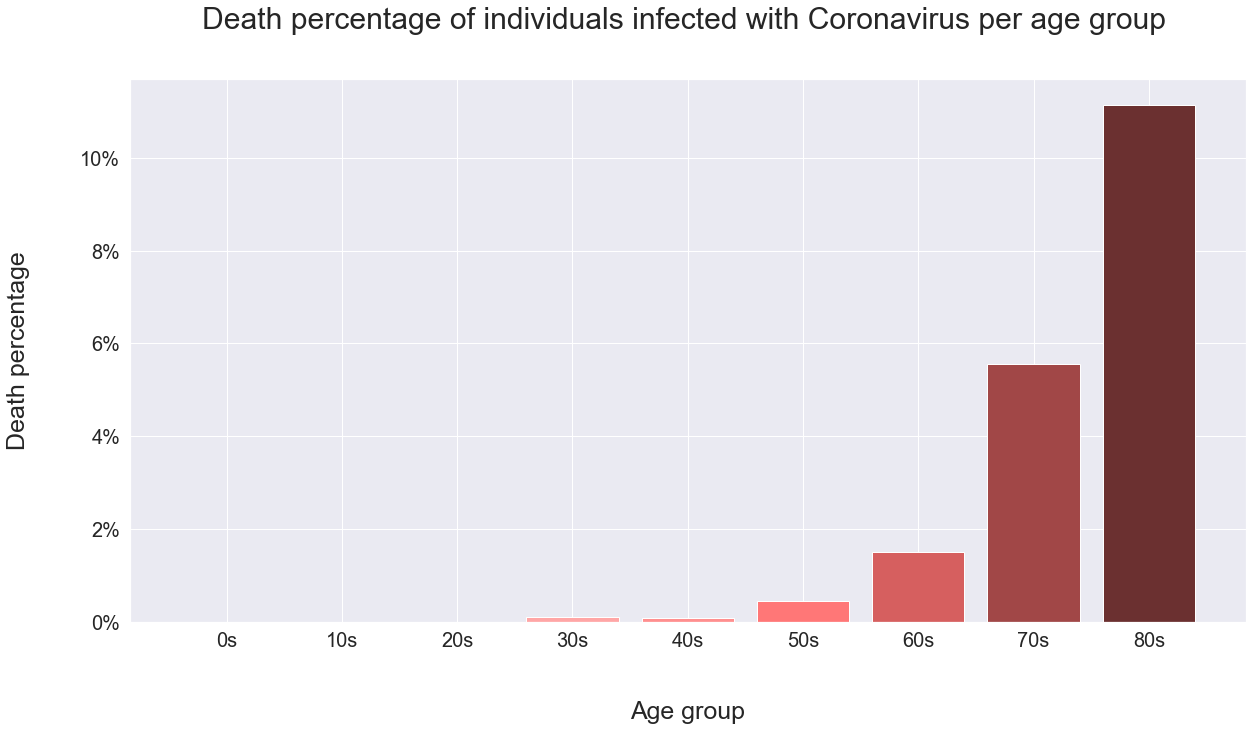

In [18]:
X = death_rate_per_age_group["age"]
Y = death_rate_per_age_group["death_rate"]

plt.figure(figsize=(20,10))

color_bar= np.clip([ (np.array(palette[3])*2)*(i*1/8) for i in range(death_rate_per_age_group.shape[0]+1,0,-1)],0,1 )
plt.bar(X,Y,color=color_bar)


plt.title("Death percentage of individuals infected with Coronavirus per age group ", fontsize=30,pad=50)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20, ticks=range(0,11,2), labels= [str(x)+"%" for x in range(0,11,2)])
plt.xlabel(xlabel="Age group" , fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel(ylabel="Death percentage" , fontsize=25, fontname="Sans",labelpad=50)

plt.show()

It looks like the older you get the more probable you are going to die from the virus.

### 2.3 How long does it take on average for a person to die from COVID-19?

In [19]:
death_time = pd.read_csv("DS4C/PatientInfo.csv")
death_time.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [20]:
death_time["country"].unique()

array(['Korea', 'China', 'United States', 'France', 'Thailand',
       'Switzerland', 'Mongolia'], dtype=object)

In [21]:
death_time.dropna(subset=["deceased_date"],inplace=True)
death_time['confirmed_date'] = pd.to_datetime(death_time['confirmed_date'])
death_time['deceased_date'] = pd.to_datetime(death_time['deceased_date'])

filtered = death_time[death_time["confirmed_date"] < death_time["deceased_date"]]

filtered['deceased_time'] = filtered['deceased_date'] - filtered['confirmed_date'] 


C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


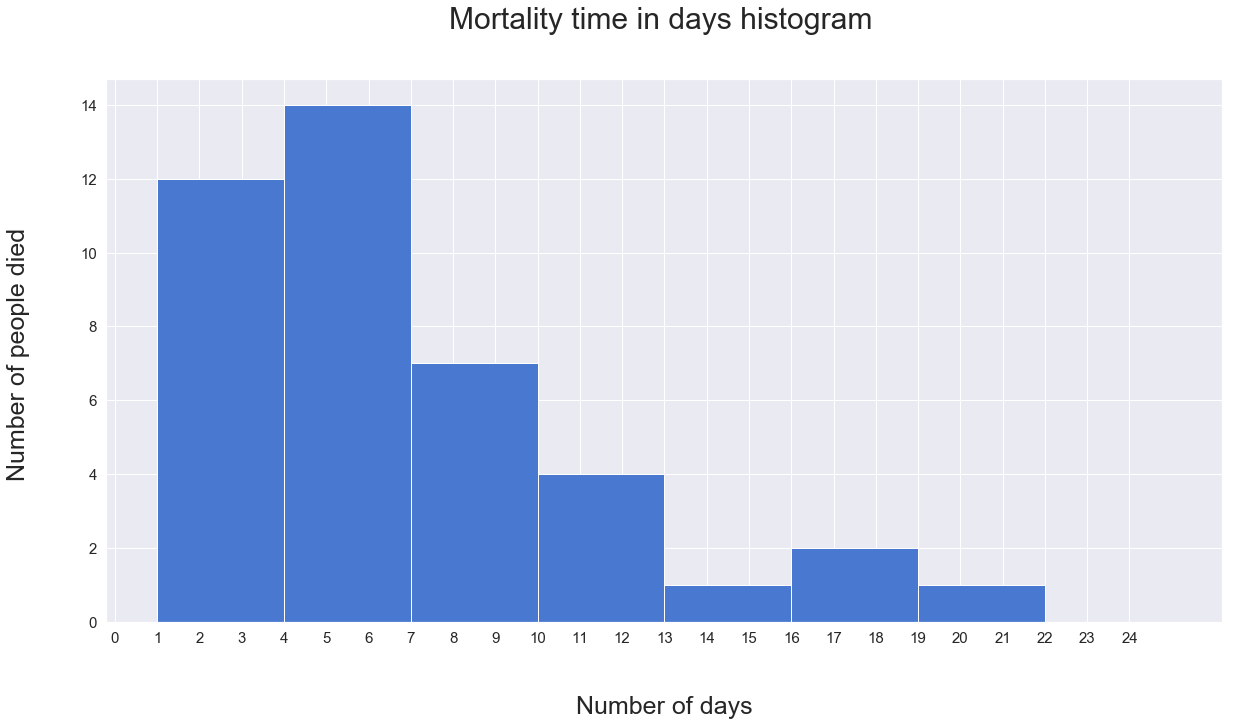

In [22]:
X = filtered['deceased_time'].apply(lambda x: x.days) 

plt.figure(figsize=(20,10))
plt.hist(X, bins=range(1,26,3))

plt.title("Mortality time in days histogram ", fontsize=30,pad=50)
plt.xlabel("Number of days", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of people died ", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(fontsize=15,ticks=range(0,25))
plt.yticks(fontsize=15)

plt.show()

It looks like most of the people die before 7 days. 

### 2.4 Which countires have the highest number of death from corona ?

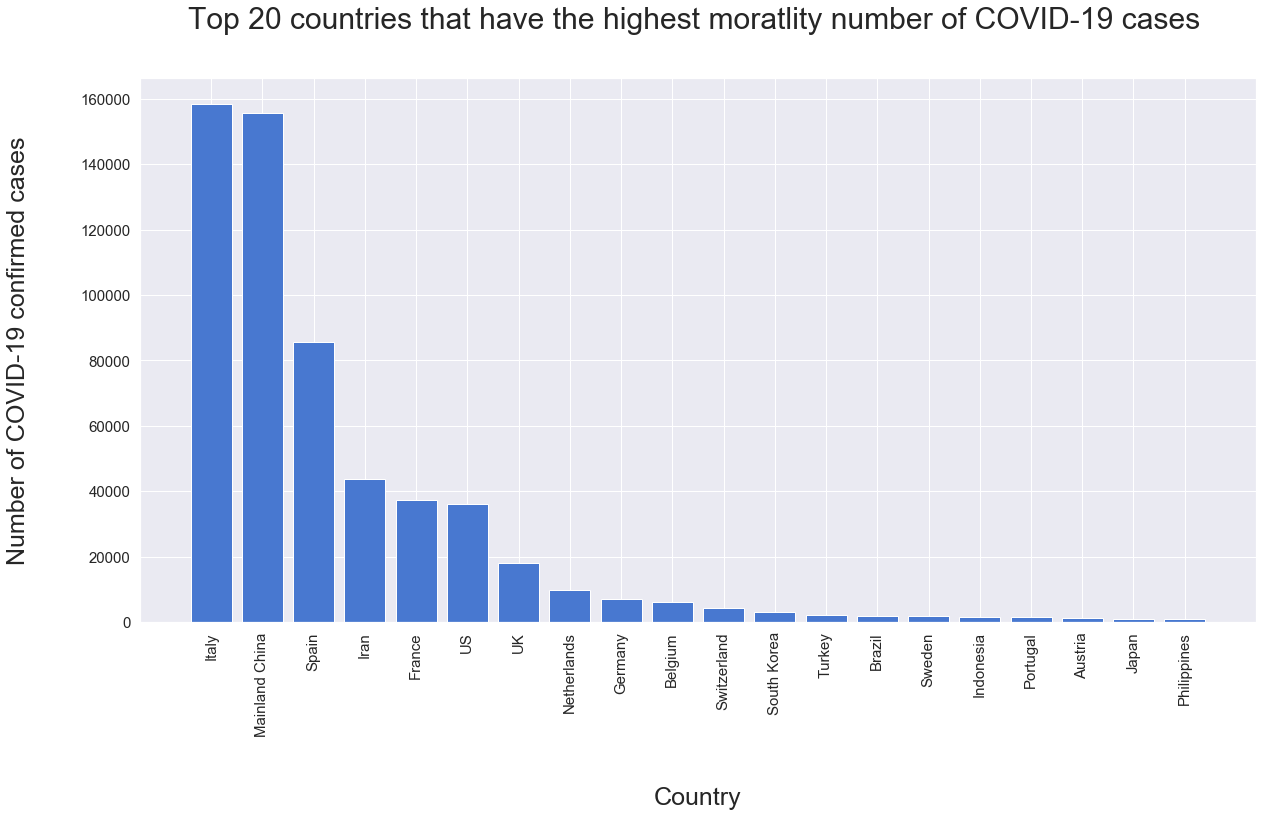

In [39]:
number_of_Death_by_country = covid_19_data.groupby("Country/Region").sum()["Deaths"].reset_index().sort_values("Deaths", ascending=False)
X= number_of_Death_by_country["Country/Region"][:20]
Y= number_of_Death_by_country["Deaths"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)



plt.title("Top 20 countries that have the highest moratlity number of COVID-19 cases ", fontsize=30,pad=50)

plt.xlabel("Country", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of COVID-19 confirmed cases", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)



plt.show()


> Italy now has the highest number of death, it even exceeded china. Also spain recently increased drastically. 

## 3. Recovery rates

### 3.1 What is the average recovery time from COVID-19? Does it vary by age group ?     

In [24]:
recovery_time = pd.read_csv("DS4C/PatientInfo.csv")
recovery_time.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [25]:
recovery_time['confirmed_date'] = pd.to_datetime(recovery_time['confirmed_date'])
recovery_time['released_date'] = pd.to_datetime(recovery_time['released_date'])
recovery_time['deceased_date'] = pd.to_datetime(recovery_time['deceased_date'])

In [26]:
filtered= recovery_time[recovery_time['released_date'].isnull()==False]
filtered= recovery_time[recovery_time['released_date'] > recovery_time['confirmed_date']]

filtered.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaT,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaT,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaT,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaT,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaT,released


In [27]:
filtered['recovery_time'] = filtered['released_date']-filtered['confirmed_date']

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
filtered['recovery_time'] = filtered['recovery_time'].apply(lambda x : x.days)

C:\Users\Abdullah\Anaconda3\envs\tensorflowEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
filtered['recovery_time'].mean()

18.439265536723163

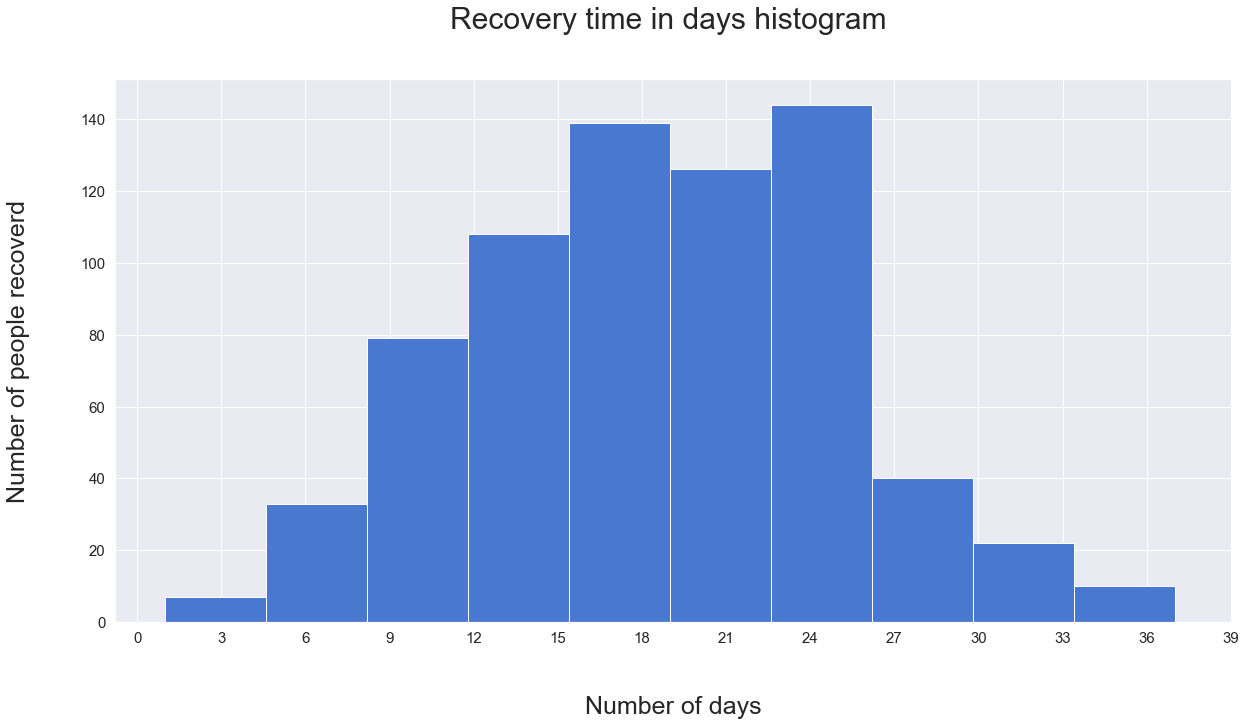

In [30]:
X = filtered['recovery_time']

plt.figure(figsize=(20,10))
plt.hist(X)
plt.xticks(ticks=range(0,40,3))


plt.title("Recovery time in days histogram ", fontsize=30,pad=50)
plt.xlabel("Number of days", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of people recoverd", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

> on average it takes about 18 days for someone to recover from the virus and get released

### 3.1.2 Does recover time vary by age group ?

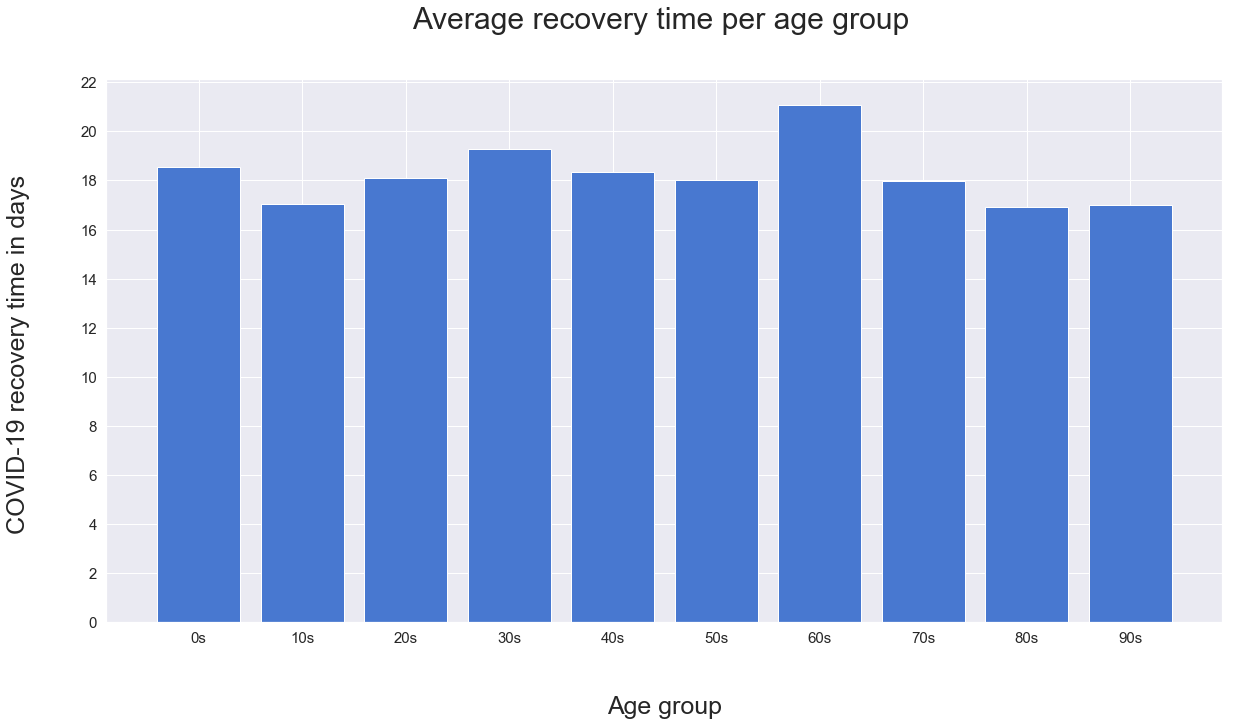

In [31]:
recovery_time_per_age = filtered.groupby("age").mean()["recovery_time"].reset_index()

X = recovery_time_per_age["age"]
Y = recovery_time_per_age["recovery_time"]

plt.figure(figsize=(20,10))

plt.title("Average recovery time per age group ", fontsize=30,pad=50)

plt.xlabel("Age group", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("COVID-19 recovery time in days ", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15, ticks=range(0,25,2))

plt.bar(X,Y)
plt.show()

> The data does not show that there is much difference in recovery time between age groups

### 3.2 What are the top 20 countries that have the highest **number** of recoveries? 

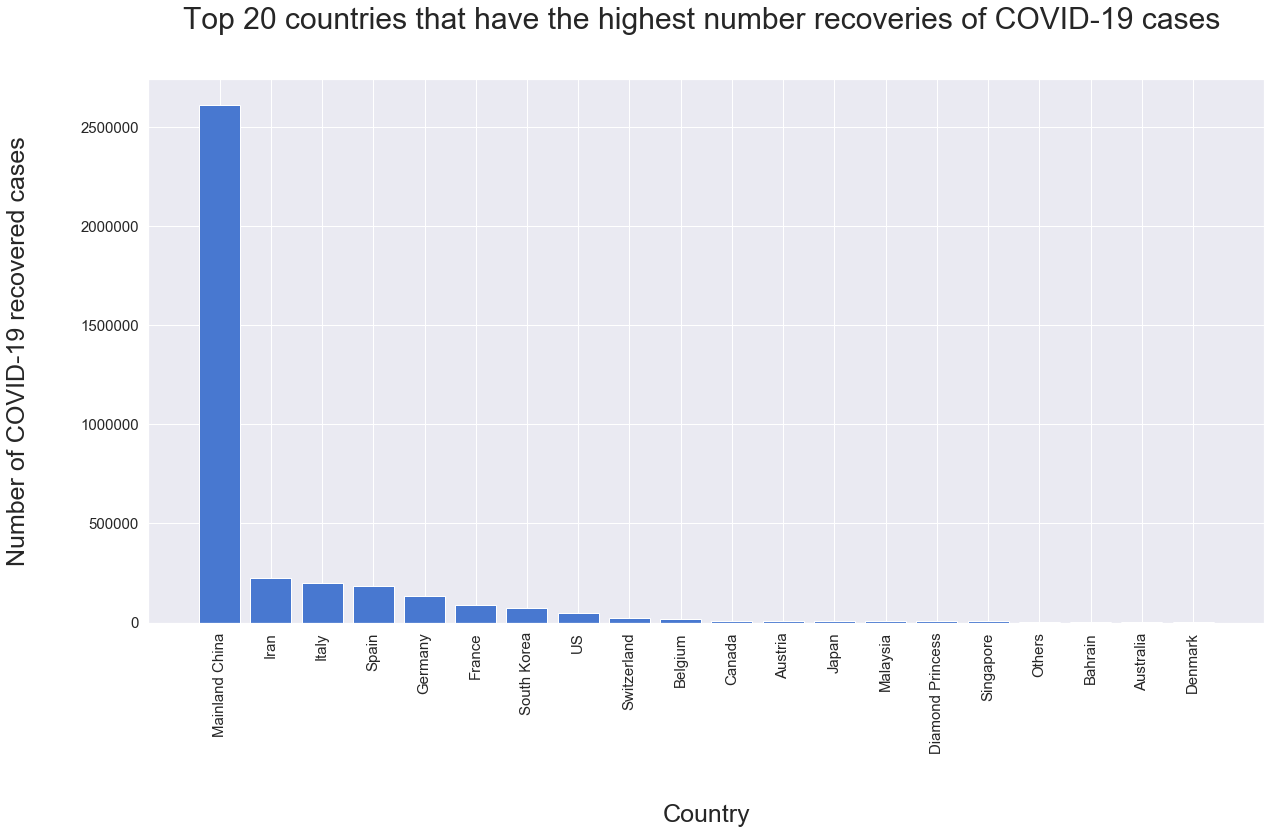

In [32]:
number_of_recoverd_by_country = covid_19_data.groupby("Country/Region").sum()[["Recovered","Confirmed"]].reset_index().sort_values("Recovered", ascending=False)
X= number_of_recoverd_by_country["Country/Region"][:20]
Y= number_of_recoverd_by_country["Recovered"][:20]

plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.title("Top 20 countries that have the highest number recoveries of COVID-19 cases ", fontsize=30,pad=50)

plt.xlabel("Country", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("Number of COVID-19 recovered cases", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)




plt.show()

> It looks like china has the highest number of people recovered. But lets see the percentage of people recovered to normalize the popluation densities in each country. 

### 3.3 What are the top 20 countries that have the highest **percentage** of recoveries?

In [33]:
number_of_recoverd_by_country["recovery_rate"] = number_of_recoverd_by_country["Recovered"]/number_of_recoverd_by_country["Confirmed"]

In [34]:
number_of_recoverd_by_country.sort_values("recovery_rate",ascending=False).head()

,Country/Region,Recovered,Confirmed,recovery_rate
53,Diamond Princess,6028.0,7120.0,0.846629
122,Mainland China,2612126.0,4421011.0,0.590844
140,Nepal,52.0,109.0,0.477064
120,Macau,438.0,1010.0,0.433663
16,Bahrain,4146.0,9810.0,0.422630


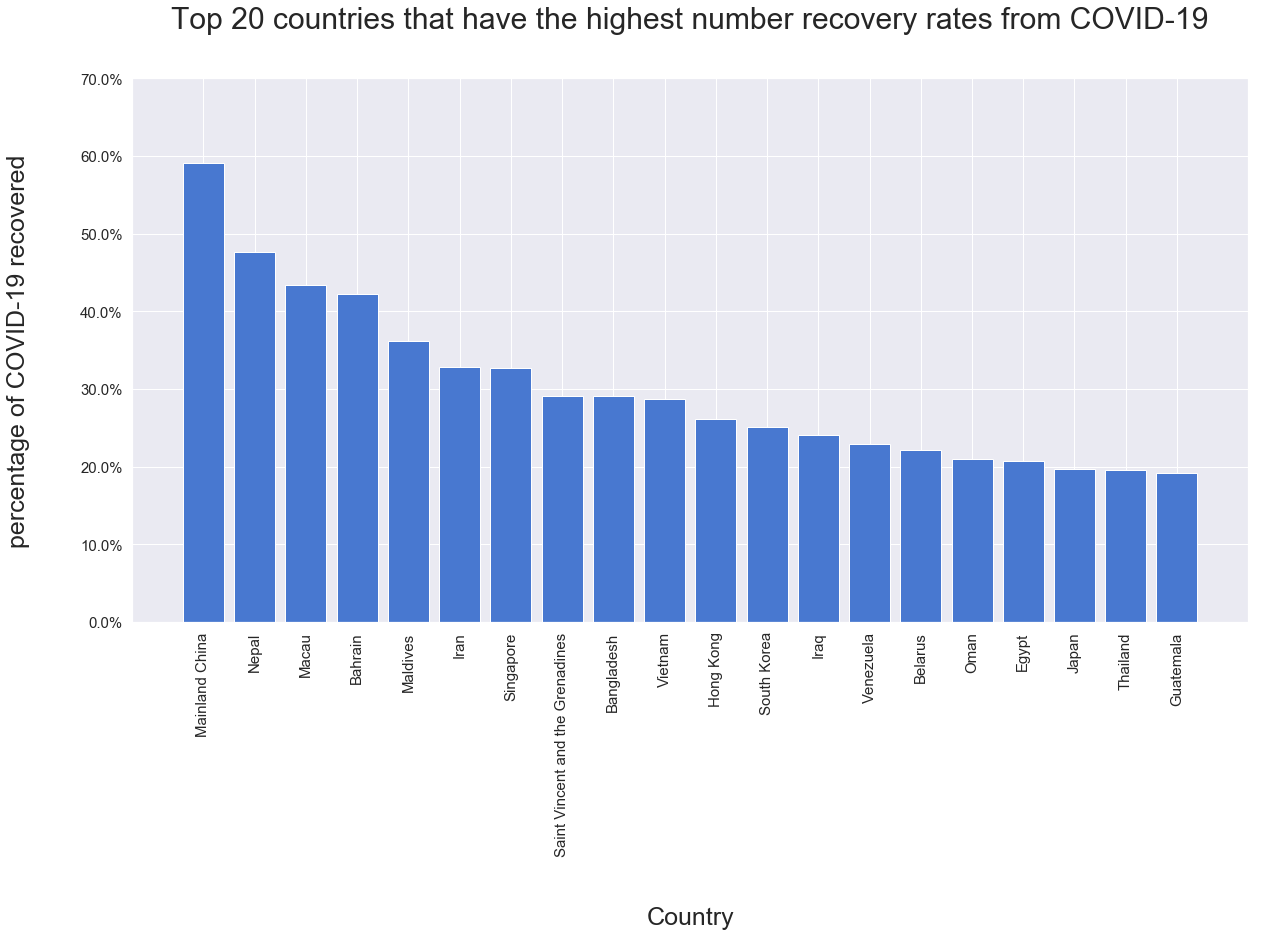

In [35]:
number_of_recoverd_by_country = covid_19_data.groupby("Country/Region").sum()[["Recovered","Confirmed"]].reset_index()
number_of_recoverd_by_country["recovery_rate"]=number_of_recoverd_by_country["Recovered"]/number_of_recoverd_by_country["Confirmed"]
number_of_recoverd_by_country= number_of_recoverd_by_country.sort_values("recovery_rate",ascending=False)

X= number_of_recoverd_by_country["Country/Region"][1:21]
Y= number_of_recoverd_by_country["recovery_rate"][1:21]

plt.figure(figsize=(20,10))
plt.bar(X,Y)
plt.title("Top 20 countries that have the highest number recovery rates from COVID-19", fontsize=30,pad=50)

plt.xlabel("Country", fontsize=25, fontname="Sans",labelpad=50)
plt.ylabel("percentage of COVID-19 recovered", fontsize=25, fontname="Sans",labelpad=50)

plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15, ticks=np.arange(0, 0.8, 0.1).tolist(), labels=[ str(round(x,2))+"%" for x in (np.arange(0, 0.8, 0.1)*100).tolist()] )




plt.show()

> China still has the highest percenatge of people who recovered from COVID-19. But the following countries varied. 